In [ ]:
## Installation

In [6]:
!pip install imbalanced-learn

In [7]:
!pip install seaborn

In [8]:
! pip install shap

In [9]:
import pandas as pd

In [10]:
train = pd.read_csv('train.csv',sep=';')

## Explorasi Data Training

In [11]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [12]:
train['y_value'] = list(map(lambda x:1 if x=='yes' else 0,train['y']))

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
 17  y_value    45211 non-null  int64 
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [14]:
cek_numeric = train.describe()
cek_numeric

,age,balance,day,duration,campaign,pdays,previous,y_value
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [17]:
categorical_col = list(set(train.columns)-set(cek_numeric.columns))
categorical_col

['contact',
 'poutcome',
 'loan',
 'job',
 'default',
 'education',
 'month',
 'y',
 'housing',
 'marital']

In [18]:
cat_explored = {}
for cat in categorical_col:
    data_cat = train[[cat]].groupby([cat])[cat].count()
    cat_explored[cat]=data_cat

In [19]:
cat_explored

{'contact': contact
 cellular     29285
 telephone     2906
 unknown      13020
 Name: contact, dtype: int64,
 'poutcome': poutcome
 failure     4901
 other       1840
 success     1511
 unknown    36959
 Name: poutcome, dtype: int64,
 'loan': loan
 no     37967
 yes     7244
 Name: loan, dtype: int64,
 'job': job
 admin.           5171
 blue-collar      9732
 entrepreneur     1487
 housemaid        1240
 management       9458
 retired          2264
 self-employed    1579
 services         4154
 student           938
 technician       7597
 unemployed       1303
 unknown           288
 Name: job, dtype: int64,
 'default': default
 no     44396
 yes      815
 Name: default, dtype: int64,
 'education': education
 primary       6851
 secondary    23202
 tertiary     13301
 unknown       1857
 Name: education, dtype: int64,
 'month': month
 apr     2932
 aug     6247
 dec      214
 feb     2649
 jan     1403
 jul     6895
 jun     5341
 mar      477
 may    13766
 nov     3970
 oct      73

In [21]:
# Explorasi Visual

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# variabel y

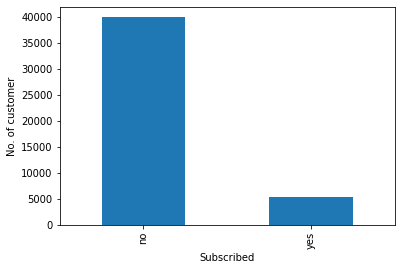

In [22]:
train['y'].value_counts().plot(kind='bar')
plt.xlabel('Subscribed')
plt.ylabel('No. of customer')
plt.show()

<AxesSubplot:xlabel='age', ylabel='y'>

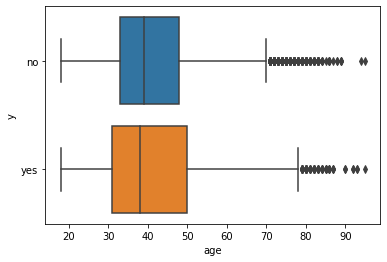

In [43]:
sns.boxplot(data=train, x="age", y="y")

<AxesSubplot:xlabel='balance', ylabel='y'>

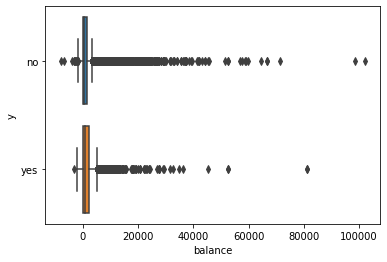

In [44]:
sns.boxplot(data=train, x="balance", y="y")

<AxesSubplot:xlabel='previous', ylabel='y'>

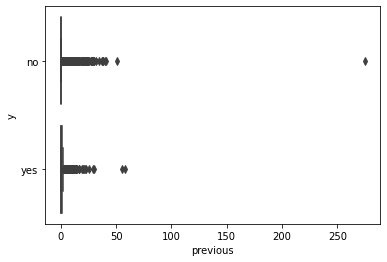

In [45]:
sns.boxplot(data=train, x="previous", y="y")

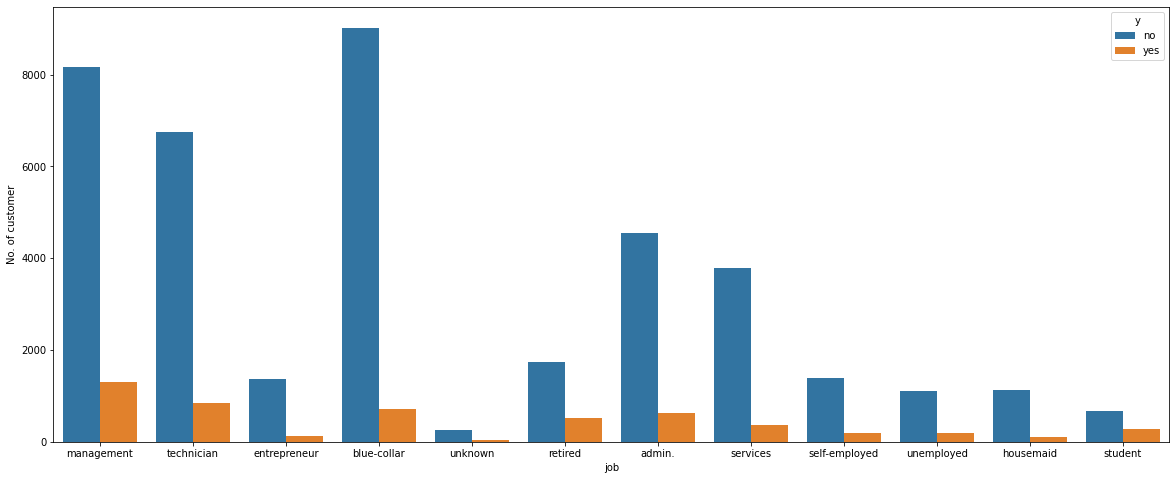

In [23]:
plt.figure(figsize=(20,8))
sns.countplot(data=train,x='job',hue='y')
plt.ylabel('No. of customer')
plt.show()

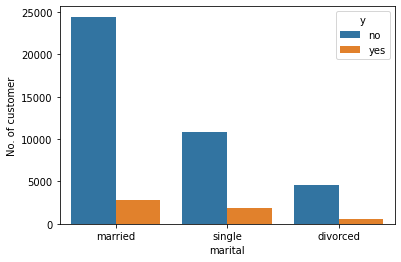

In [14]:
sns.countplot(data=train,x='marital',hue='y')
plt.ylabel('No. of customer')
plt.show()

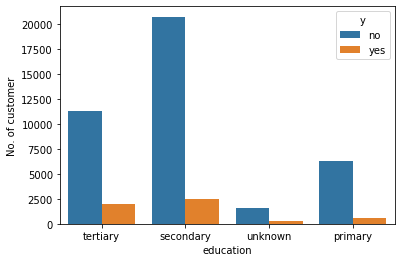

In [26]:
sns.countplot(data=train,x='education',hue='y')
plt.ylabel('No. of customer')
plt.show()

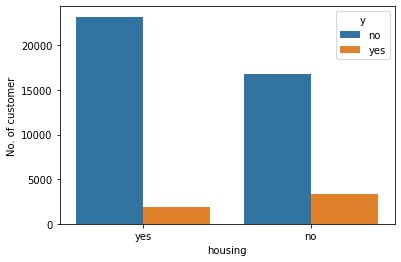

In [28]:
sns.countplot(data=train,x='housing',hue='y')
plt.ylabel('No. of customer')
plt.show()

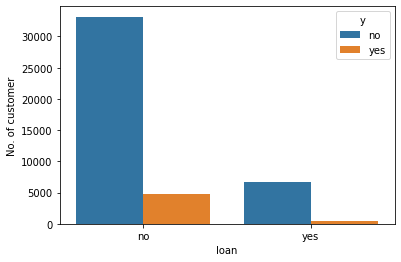

In [30]:
sns.countplot(data=train,x='loan',hue='y')
plt.ylabel('No. of customer')
plt.show()

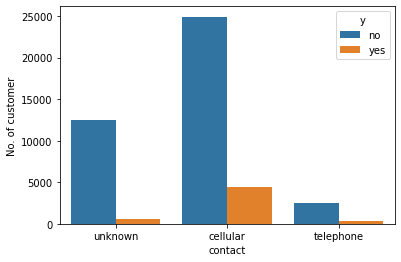

In [32]:
sns.countplot(data=train,x='contact',hue='y')
plt.ylabel('No. of customer')
plt.show()

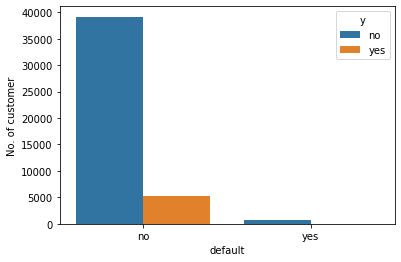

In [34]:
sns.countplot(data=train,x='default',hue='y')
plt.ylabel('No. of customer')
plt.show()

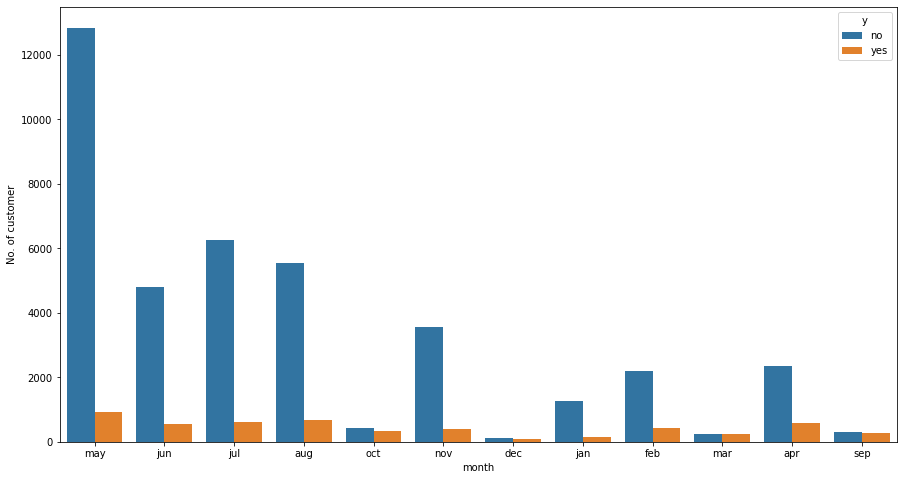

In [36]:
plt.figure(figsize=(15,8))
sns.countplot(data=train,x='month',hue='y')
plt.ylabel('No. of customer')
plt.show()

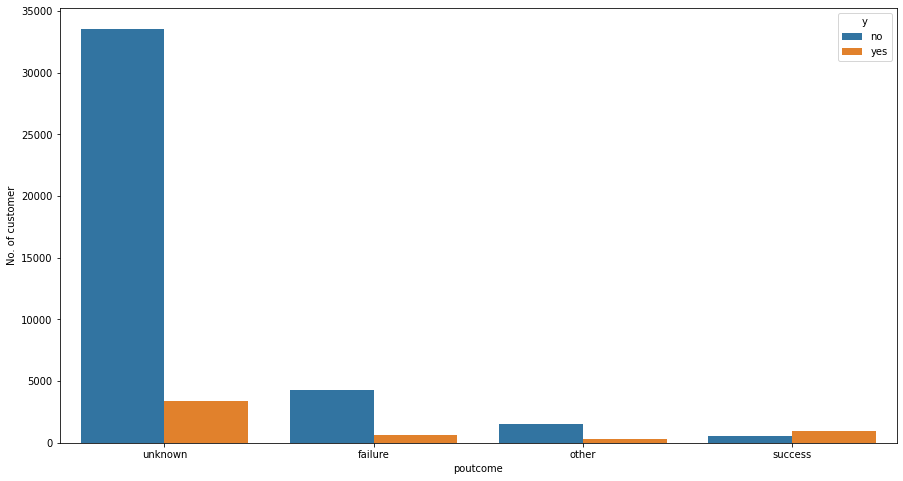

In [38]:
plt.figure(figsize=(15,8))
sns.countplot(data=train,x='poutcome',hue='y')
plt.ylabel('No. of customer')
plt.show()

In [33]:
import numpy as np

In [40]:
def grouping_campaign(x):
    if x==1:
        return "1 contact"
    elif x==2:
        return "2 contacts"
    elif x==3:
        return "3 contacts"
    elif x==4:
        return "4 contacts"
    elif x<=10:
        return "5-10 contacts"
    elif x<=15:
        return "11-15 contacts"
    elif x<=20:
        return '16-20 contacts'
    elif x<=25:
        return '21-25 contacts'
    elif x<=30:
        return '25-30 contact'
    else:
        return "> 30 contacts"

In [41]:
train['campaign_grp'] = list(map(lambda x:grouping_campaign(x),train['campaign']))

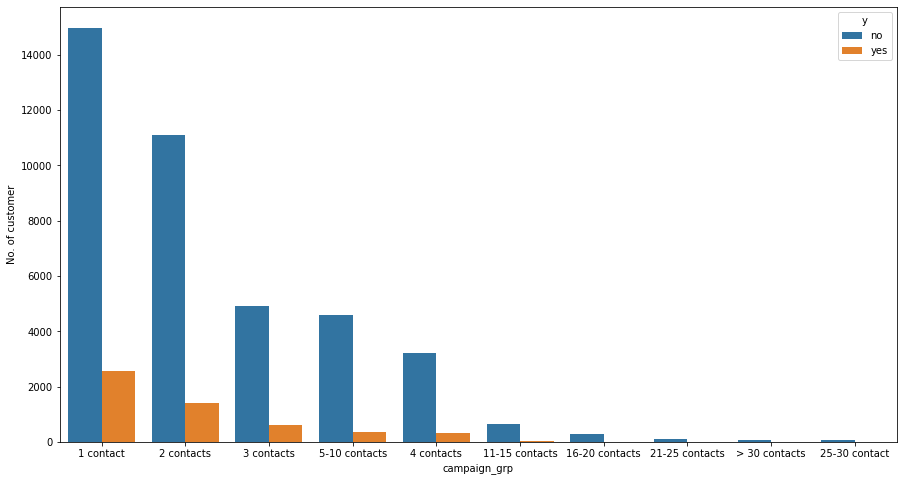

In [42]:
plt.figure(figsize=(15,8))
sns.countplot(data=train,x='campaign_grp',hue='y')
plt.ylabel('No. of customer')
plt.show()

## Encoding

In [39]:
train['has_default'] = list(map(lambda x: 1 if x=='yes' else 0,train['default']))
train['has_housing'] = list(map(lambda x: 1 if x=='yes' else 0,train['housing']))
train['has_loan'] = list(map(lambda x: 1 if x=='yes' else 0,train['loan']))

In [40]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'y_value', 'campaign_grp', 'has_default',
       'has_housing', 'has_loan'],
      dtype='object')

In [41]:
category_var = ['job', 'marital', 'education','month','poutcome','campaign_grp']

In [42]:
from sklearn.preprocessing import OneHotEncoder
import pickle
for var in category_var:
    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe_model = ohe.fit(train[var].to_frame())
    pickle.dump(ohe_model,open(f'ohe_hot_encoder_{var}.pkl','wb'))
    encode_res = pd.DataFrame(ohe_model.transform(train[[var]]).toarray())
    encode_res.columns = map(lambda x: var+'_'+str(x),ohe_model.categories_[0].tolist())
    train = pd.merge(train, encode_res, left_index=True, right_index=True)

In [43]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign_grp_1 contact,campaign_grp_11-15 contacts,campaign_grp_16-20 contacts,campaign_grp_2 contacts,campaign_grp_21-25 contacts,campaign_grp_25-30 contact,campaign_grp_3 contacts,campaign_grp_4 contacts,campaign_grp_4-10 contacts,campaign_grp_> 30 contacts
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Data Balancing

In [44]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'y_value', 'campaign_grp', 'has_default',
       'has_housing', 'has_loan', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'campaign_grp_1 contact',
       'campaign_grp_11-15 contacts', 'campaign_grp_16-20 cont

In [45]:
var_x = ['age','balance',
       'previous', 'has_default', 'has_housing',
       'has_loan', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'campaign_grp_1 contact', 'campaign_grp_11-15 contacts',
       'campaign_grp_16-20 contacts', 'campaign_grp_2 contacts',
       'campaign_grp_21-25 contacts', 'campaign_grp_25-30 contact',
       'campaign_grp_3 contacts', 'campaign_grp_4 contacts',
       'campaign_grp_4-10 contacts', 'campaign_grp_> 30 contacts']
var_y = ['y_value']

In [46]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_sm , y_sm = sm.fit_resample(train[var_x], train[var_y])
y_sm.y_value.value_counts()

0    39922
1    39922
Name: y_value, dtype: int64

## Training

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,roc_curve,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

X_train_sm , X_test_sm , y_train_sm , y_test_sm = train_test_split(X_sm,y_sm, test_size = 0.2, random_state = 42)

### Logistic Regression

In [48]:
lr=LogisticRegression(solver='liblinear', fit_intercept=True)

In [49]:
lr_model = lr.fit(X_train_sm,y_train_sm)

C:\Users\hp\Anaconda2\envs\dattabot-nlp\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
predicted_y = lr_model.predict(X_test_sm)
proba_y = lr_model.predict_proba(X_test_sm)[:, 1]

In [51]:
print('Overall accuracy - test:' , accuracy_score(y_test_sm, predicted_y))
print('AUC - test', roc_auc_score(y_test_sm,proba_y))
print('Classification report - test: ','\n',classification_report(y_test_sm,predicted_y))
print('Confusion matrix - test: ','\n',confusion_matrix(y_test_sm,predicted_y))

Overall accuracy - test: 0.7646064249483374
AUC - test 0.8335835749627101
Classification report - test:  
               precision    recall  f1-score   support

           0       0.76      0.77      0.76      7908
           1       0.77      0.76      0.77      8061

    accuracy                           0.76     15969
   macro avg       0.76      0.76      0.76     15969
weighted avg       0.76      0.76      0.76     15969

Confusion matrix - test:  
 [[6074 1834]
 [1925 6136]]


### Decision Tree

In [93]:
dt=DecisionTreeClassifier()
max_depth = [12,13,14]
min_samples_split = [9,10,11]

param_grid = dict(max_depth=max_depth,min_samples_split=min_samples_split)

grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1)
dt_model = grid_dt.fit(X_train_sm,y_train_sm)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [94]:
dt_model.best_estimator_

DecisionTreeClassifier(max_depth=14, min_samples_split=10)

In [95]:
predicted_y = dt_model.predict(X_test_sm)
proba_y = dt_model.predict_proba(X_test_sm)[:, 1]

In [96]:
print('Overall accuracy - test:' , accuracy_score(y_test_sm, predicted_y))
print('AUC - test', roc_auc_score(y_test_sm,proba_y))
print('Classification report - test: ','\n',classification_report(y_test_sm,predicted_y))
print('Confusion matrix - test: ','\n',confusion_matrix(y_test_sm,predicted_y))

Overall accuracy - test: 0.9235393575051662
AUC - test 0.9489168939266017
Classification report - test:  
               precision    recall  f1-score   support

           0       0.89      0.96      0.93      7908
           1       0.96      0.89      0.92      8061

    accuracy                           0.92     15969
   macro avg       0.93      0.92      0.92     15969
weighted avg       0.93      0.92      0.92     15969

Confusion matrix - test:  
 [[7603  305]
 [ 916 7145]]


### Random Forest

In [97]:
rf = RandomForestClassifier()
n_estimators = [33,35,37]
max_depth = [9,12,15]
min_samples_split = [3,5,7]

param_grid = dict(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split)

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1)
rf_model = grid_rf.fit(X_train_sm,y_train_sm)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [98]:
rf_model.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=3, n_estimators=33)

In [99]:
predicted_y = rf_model.predict(X_test_sm)
proba_y = rf_model.predict_proba(X_test_sm)[:, 1]

In [100]:
print('Overall accuracy - test:' , accuracy_score(y_test_sm, predicted_y))
print('AUC - test', roc_auc_score(y_test_sm,proba_y))
print('Classification report - test: ','\n',classification_report(y_test_sm,predicted_y))
print('Confusion matrix - test: ','\n',confusion_matrix(y_test_sm,predicted_y))

Overall accuracy - test: 0.9333709061306281
AUC - test 0.9651136155353618
Classification report - test:  
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7908
           1       0.97      0.89      0.93      8061

    accuracy                           0.93     15969
   macro avg       0.94      0.93      0.93     15969
weighted avg       0.94      0.93      0.93     15969

Confusion matrix - test:  
 [[7722  186]
 [ 878 7183]]


In [101]:
pickle.dump(rf_model, open('random_forest_model.pkl', 'wb'))

## Model Intepretation

In [61]:
import shap

In [62]:
# Fits the explainer
explainer = shap.Explainer(rf_model.predict, X_test_sm)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test_sm)

Permutation explainer: 15970it [42:13,  6.30it/s]                                                                                                                    


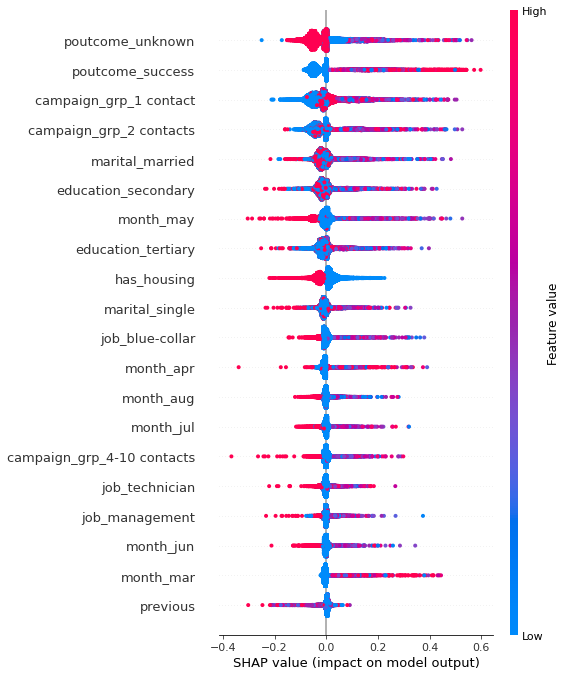

In [63]:
shap.summary_plot(shap_values)

## Test Data

In [102]:
test = pd.read_csv('test.csv',sep=';')

In [103]:
test['has_default'] = list(map(lambda x: 1 if x=='yes' else 0,test['default']))
test['has_housing'] = list(map(lambda x: 1 if x=='yes' else 0,test['housing']))
test['has_loan'] = list(map(lambda x: 1 if x=='yes' else 0,test['loan']))

In [104]:
test['campaign_grp'] = list(map(lambda x:grouping_campaign(x),test['campaign']))

In [105]:
category_var = ['job', 'marital', 'education','month','poutcome','campaign_grp']
for var in category_var:
    ohe_model = pickle.load(open(f'ohe_hot_encoder_{var}.pkl','rb'))
    encode_res = pd.DataFrame(ohe_model.transform(test[[var]]).toarray())
    encode_res.columns = map(lambda x: var+'_'+str(x),ohe_model.categories_[0].tolist())
    test = pd.merge(test, encode_res, left_index=True, right_index=True)

In [106]:
test['prediction'] = rf_model.predict(test[var_x])
test['probability_agree'] = rf_model.predict_proba(test[var_x])[:, 1]

In [107]:
test['y_value'] = list(map(lambda x:1 if x=='yes' else 0,test['y']))

In [108]:
print('Overall accuracy - test:' , accuracy_score(test['y_value'], test['prediction']))
print('AUC - test', roc_auc_score(test['y_value'], test['probability_agree']))
print('Classification report - test: ','\n',classification_report(test['y_value'], test['prediction']))
print('Confusion matrix - test: ','\n',confusion_matrix(test['y_value'], test['prediction']))

Overall accuracy - test: 0.9024552090245521
AUC - test 0.8427413627639155
Classification report - test:  
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      4000
           1       0.69      0.28      0.40       521

    accuracy                           0.90      4521
   macro avg       0.80      0.63      0.67      4521
weighted avg       0.89      0.90      0.88      4521

Confusion matrix - test:  
 [[3936   64]
 [ 377  144]]
